In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns # Để vẽ ma trận nhầm lẫn đẹp hơn

In [2]:
# --- 1. Tải dữ liệu đã xử lý ---
PROCESSED_DATA_DIR = "../data/processed/"

X = np.load(os.path.join(PROCESSED_DATA_DIR, 'features.npy'))
y = np.load(os.path.join(PROCESSED_DATA_DIR, 'labels.npy'))

print(f"Đã tải X với shape: {X.shape}")
print(f"Đã tải y với shape: {y.shape}")

# --- 2. Chuẩn bị dữ liệu ---

# a) Chuẩn hóa Đặc trưng (X)
# StandardScaler sẽ biến đổi dữ liệu để có mean = 0 và std = 1
# Điều này rất quan trọng cho các mô hình như SVM.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# b) Mã hóa Nhãn (y)
# Chuyển đổi nhãn chữ ('happy', 'sad'...) thành số (0, 1, 2...)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Lấy danh sách tên các lớp (ví dụ: ['angry', 'calm', ...]) để dùng khi vẽ biểu đồ
class_names = list(encoder.classes_)
print(f"Các lớp cảm xúc: {class_names}")


# --- 3. Chia dữ liệu (Train/Test Split) ---
# Chia 80% dữ liệu để huấn luyện (train) và 20% để kiểm tra (test)
# stratify=y_encoded: Đảm bảo tỷ lệ các cảm xúc trong tập train và test là như nhau
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_encoded, 
    test_size=0.2, 
    random_state=42, # 'random_state' để đảm bảo kết quả có thể lặp lại
    stratify=y_encoded
)

print(f"Shape của X_train: {X_train.shape}")
print(f"Shape của X_test: {X_test.shape}")
print(f"Shape của y_train: {y_train.shape}")
print(f"Shape của y_test: {y_test.shape}")

Đã tải X với shape: (1440, 22)
Đã tải y với shape: (1440,)
Các lớp cảm xúc: [np.str_('angry'), np.str_('calm'), np.str_('disgust'), np.str_('fearful'), np.str_('happy'), np.str_('neutral'), np.str_('sad'), np.str_('surprised')]
Shape của X_train: (1152, 22)
Shape của X_test: (288, 22)
Shape của y_train: (1152,)
Shape của y_test: (288,)


In [3]:
from sklearn.svm import SVC

# --- 4. Khởi tạo và Huấn luyện Mô hình ---

# 'kernel='linear'': Thử nghiệm với một đường_biên_giới_phẳng (linear) trước.
# 'C=1.0': Là một tham số điều chỉnh độ "chặt" của mô hình.
# 'random_state=42': Để đảm bảo kết quả nhất quán mỗi lần chạy.
print("Bắt đầu huấn luyện mô hình SVM...")

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Dùng .fit() để "dạy" mô hình trên dữ liệu huấn luyện
svm_model.fit(X_train, y_train)

print("Đã huấn luyện xong!")

# --- 5. Đánh giá ban đầu trên Tập Test ---

# Yêu cầu mô hình dự đoán cảm xúc cho dữ liệu test (X_test)
y_pred_svm = svm_model.predict(X_test)

# So sánh dự đoán (y_pred_svm) với câu trả lời đúng (y_test)
accuracy = accuracy_score(y_test, y_pred_svm)

print(f"Độ chính xác (Accuracy) của SVM trên tập test: {accuracy * 100:.2f}%")

Bắt đầu huấn luyện mô hình SVM...
Đã huấn luyện xong!
Độ chính xác (Accuracy) của SVM trên tập test: 39.58%


--- Báo cáo Phân loại (Classification Report) ---
              precision    recall  f1-score   support

       angry       0.60      0.68      0.64        38
        calm       0.31      0.47      0.38        38
     disgust       0.37      0.42      0.40        38
     fearful       0.41      0.46      0.43        39
       happy       0.36      0.26      0.30        39
     neutral       0.14      0.11      0.12        19
         sad       0.34      0.29      0.31        38
   surprised       0.50      0.33      0.40        39

    accuracy                           0.40       288
   macro avg       0.38      0.38      0.37       288
weighted avg       0.40      0.40      0.39       288


--- Đang vẽ Ma trận Nhầm lẫn (Confusion Matrix) ---


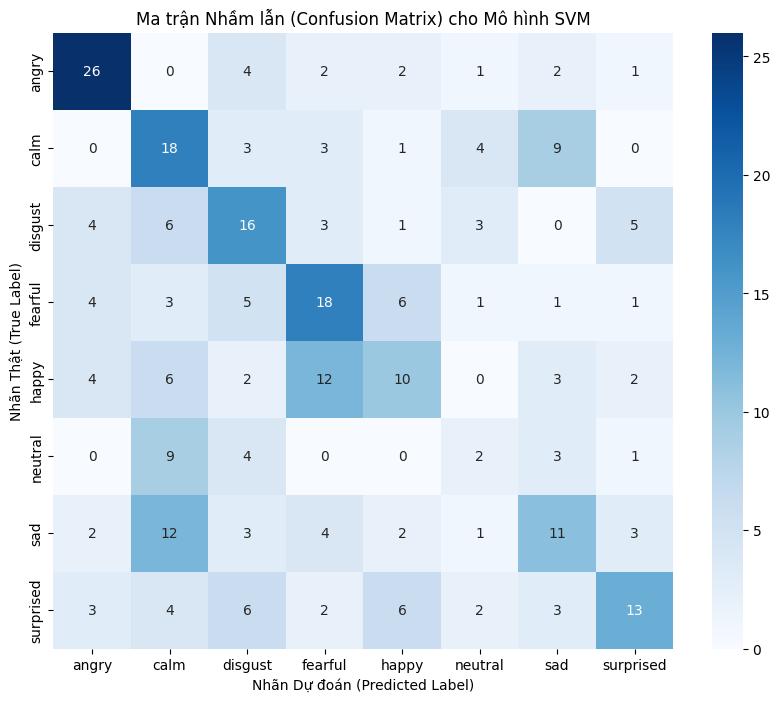

In [4]:
# --- 6. In Báo cáo Phân loại Chi tiết (Precision, Recall, F1-score) ---

# Dùng y_test (đã mã hóa) và y_pred_svm (dự đoán của SVM)
# target_names=class_names sẽ hiển thị tên cảm xúc (thay vì số 0, 1, 2...)
print("--- Báo cáo Phân loại (Classification Report) ---")
print(classification_report(y_test, y_pred_svm, target_names=class_names))


# --- 7. Vẽ Ma trận Nhầm lẫn (Confusion Matrix) ---

print("\n--- Đang vẽ Ma trận Nhầm lẫn (Confusion Matrix) ---")
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Ma trận Nhầm lẫn (Confusion Matrix) cho Mô hình SVM')
plt.ylabel('Nhãn Thật (True Label)')
plt.xlabel('Nhãn Dự đoán (Predicted Label)')
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier

# --- 8. Khởi tạo và Huấn luyện Mô hình Random Forest ---

print("\nBắt đầu huấn luyện mô hình Random Forest...")

# n_estimators=100: Sử dụng 100 "cây quyết định"
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Dùng .fit() để "dạy" mô hình trên cùng tập dữ liệu huấn luyện
rf_model.fit(X_train, y_train)

print("Đã huấn luyện xong!")

# --- 9. Đánh giá ban đầu trên Tập Test ---
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Độ chính xác (Accuracy) của Random Forest trên tập test: {accuracy_rf * 100:.2f}%")

# --- 10. In Báo cáo Phân loại Chi tiết cho Random Forest ---
print("\n--- Báo cáo Phân loại (Random Forest) ---")
print(classification_report(y_test, y_pred_rf, target_names=class_names))


Bắt đầu huấn luyện mô hình Random Forest...
Đã huấn luyện xong!
Độ chính xác (Accuracy) của Random Forest trên tập test: 56.60%

--- Báo cáo Phân loại (Random Forest) ---
              precision    recall  f1-score   support

       angry       0.71      0.66      0.68        38
        calm       0.53      0.82      0.65        38
     disgust       0.44      0.55      0.49        38
     fearful       0.56      0.62      0.59        39
       happy       0.70      0.41      0.52        39
     neutral       0.60      0.32      0.41        19
         sad       0.47      0.45      0.46        38
   surprised       0.66      0.59      0.62        39

    accuracy                           0.57       288
   macro avg       0.58      0.55      0.55       288
weighted avg       0.58      0.57      0.56       288



In [6]:
import joblib
import os

# Tạo thư mục 'models' nếu chưa có
MODEL_DIR = "../models/"
os.makedirs(MODEL_DIR, exist_ok=True)

# Lưu mô hình Random Forest
joblib.dump(rf_model, os.path.join(MODEL_DIR, "rf_emotion_model_v1.pkl"))

# Lưu cả scaler và encoder (Rất quan trọng cho app sau này)
joblib.dump(scaler, os.path.join(MODEL_DIR, "scaler_v1.pkl"))
joblib.dump(encoder, os.path.join(MODEL_DIR, "encoder_v1.pkl"))

print(f"Đã lưu mô hình, scaler, và encoder vào thư mục {MODEL_DIR}")

Đã lưu mô hình, scaler, và encoder vào thư mục ../models/


In [1]:
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Tải dữ liệu ĐÃ LỌC (Tên file mới) ---
PROCESSED_DATA_DIR = "../data/processed/"

X = np.load(os.path.join(PROCESSED_DATA_DIR, 'features_filtered.npy'))
y = np.load(os.path.join(PROCESSED_DATA_DIR, 'labels_filtered.npy'))

print(f"Đã tải X_filtered với shape: {X.shape}")
print(f"Đã tải y_filtered với shape: {y.shape}")

# --- 2. Chuẩn bị dữ liệu (Giữ nguyên) ---

# a) Chuẩn hóa Đặc trưng (X)
scaler_v2 = StandardScaler() # Tạo scaler mới
X_scaled = scaler_v2.fit_transform(X)

# b) Mã hóa Nhãn (y)
encoder_v2 = LabelEncoder() # Tạo encoder mới
y_encoded = encoder_v2.fit_transform(y)

# Lấy danh sách tên các lớp
class_names = list(encoder_v2.classes_)
print(f"Các lớp cảm xúc: {class_names}")

# --- 3. Chia dữ liệu (Giữ nguyên) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

# --- 4. Huấn luyện lại Random Forest ---

print("\nBắt đầu huấn luyện mô hình Random Forest (v2) trên dữ liệu đã lọc...")

rf_model_v2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_v2.fit(X_train, y_train)

print("Đã huấn luyện xong!")

# --- 5. Đánh giá mô hình v2 ---
y_pred_rf_v2 = rf_model_v2.predict(X_test)
accuracy_rf_v2 = accuracy_score(y_test, y_pred_rf_v2)

print(f"\nĐộ chính xác (Accuracy) của RF (v2) trên tập test: {accuracy_rf_v2 * 100:.2f}%")
print("\n--- Báo cáo Phân loại (Random Forest v2) ---")
print(classification_report(y_test, y_pred_rf_v2, target_names=class_names))

# --- 6. LƯU MÔ HÌNH V2 (Tên file mới) ---

MODEL_DIR = "../models/"
os.makedirs(MODEL_DIR, exist_ok=True)

# Lưu mô hình Random Forest
joblib.dump(rf_model_v2, os.path.join(MODEL_DIR, "rf_emotion_model_v2.pkl")) # <-- TÊN MỚI

# Lưu scaler và encoder mới
joblib.dump(scaler_v2, os.path.join(MODEL_DIR, "scaler_v2.pkl")) # <-- TÊN MỚI
joblib.dump(encoder_v2, os.path.join(MODEL_DIR, "encoder_v2.pkl")) # <-- TÊN MỚI

print(f"Đã lưu mô hình, scaler, và encoder (v2) vào thư mục {MODEL_DIR}")

Đã tải X_filtered với shape: (1440, 22)
Đã tải y_filtered với shape: (1440,)
Các lớp cảm xúc: [np.str_('angry'), np.str_('calm'), np.str_('disgust'), np.str_('fearful'), np.str_('happy'), np.str_('neutral'), np.str_('sad'), np.str_('surprised')]

Bắt đầu huấn luyện mô hình Random Forest (v2) trên dữ liệu đã lọc...
Đã huấn luyện xong!

Độ chính xác (Accuracy) của RF (v2) trên tập test: 57.99%

--- Báo cáo Phân loại (Random Forest v2) ---
              precision    recall  f1-score   support

       angry       0.78      0.74      0.76        38
        calm       0.53      0.82      0.64        38
     disgust       0.52      0.58      0.55        38
     fearful       0.54      0.51      0.53        39
       happy       0.68      0.38      0.49        39
     neutral       0.56      0.26      0.36        19
         sad       0.55      0.55      0.55        38
   surprised       0.56      0.64      0.60        39

    accuracy                           0.58       288
   macro avg     